In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # to print multiple outputs from the same cell
import math
import utils
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from operator import index
from collections import defaultdict
from scipy.stats import pearsonr
from datetime import datetime, timedelta

In [2]:
merged_df = pd.read_csv("dataset/merged_df_dataset_cleaned_with_indicators.csv")

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10460637 entries, 0 to 10460636
Data columns (total 20 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   user_id                         int64  
 1   name                            object 
 2   lang                            object 
 3   bot                             int64  
 4   account_created                 object 
 5   statuses_count                  int64  
 6   tweet_id                        int64  
 7   retweet_count                   int64  
 8   reply_count                     int64  
 9   favorite_count                  int64  
 10  num_hashtags                    int64  
 11  num_urls                        int64  
 12  num_mentions                    int64  
 13  tweet_created                   object 
 14  text                            object 
 15  account_age_in_days             int64  
 16  account_average_tweets_per_day  float64
 17  tweet_age_in_days        

In [3]:
merged_df["account_created"] = pd.to_datetime(merged_df["account_created"], errors="coerce")
merged_df["tweet_created"] = pd.to_datetime(merged_df["tweet_created"], errors="coerce")


Dropping columns that are not interesting from a correlation analysis standpoint.

In [4]:
columns_to_drop = ["user_id", "bot", "tweet_id", "account_created", "tweet_created", "text"]
correlation_df = merged_df#.drop(columns_to_drop, axis=1)# Remove the drop if you want to see the correlation of all attributes in our datasets

In [5]:
correlation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10460637 entries, 0 to 10460636
Data columns (total 20 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   user_id                         int64         
 1   name                            object        
 2   lang                            object        
 3   bot                             int64         
 4   account_created                 datetime64[ns]
 5   statuses_count                  int64         
 6   tweet_id                        int64         
 7   retweet_count                   int64         
 8   reply_count                     int64         
 9   favorite_count                  int64         
 10  num_hashtags                    int64         
 11  num_urls                        int64         
 12  num_mentions                    int64         
 13  tweet_created                   datetime64[ns]
 14  text                            object        
 

In [6]:
correlation_df.corr().style.background_gradient(cmap="coolwarm")

C:\Users\admin\AppData\Local\Temp\ipykernel_4552\2837386715.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_df.corr().style.background_gradient(cmap="coolwarm")


,user_id,bot,statuses_count,tweet_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,account_age_in_days,account_average_tweets_per_day,tweet_age_in_days,text_length,special_char_in_text
user_id,1.000000,-0.097852,0.066489,0.113674,0.014203,-0.000352,0.000202,-0.030695,-0.136429,0.057440,-0.878102,0.257644,-0.209966,-0.130332,-0.116868
bot,-0.097852,1.000000,-0.186904,-0.114692,-0.028198,0.000042,0.000412,-0.109304,0.120588,-0.406830,-0.085223,-0.191094,0.187361,0.190793,0.169743
statuses_count,0.066489,-0.186904,1.000000,-0.133700,0.003202,-0.000019,0.000243,0.050118,-0.024690,0.063917,-0.037229,0.930769,0.238795,-0.016096,-0.016841
tweet_id,0.113674,-0.114692,-0.133700,1.000000,0.012198,-0.002753,-0.002141,0.011947,0.014372,0.076945,-0.111219,-0.066665,-0.555980,-0.041808,-0.055525
retweet_count,0.014203,-0.028198,0.003202,0.012198,1.000000,-0.000010,0.001801,0.002392,-0.007019,0.030064,-0.012728,0.007267,-0.015337,0.013082,0.015547
reply_count,-0.000352,0.000042,-0.000019,-0.002753,-0.000010,1.000000,0.000021,0.000217,-0.000261,0.000098,0.000386,-0.000149,-0.000051,-0.000309,-0.000373
favorite_count,0.000202,0.000412,0.000243,-0.002141,0.001801,0.000021,1.000000,0.000370,0.000375,0.000243,-0.000209,0.000543,0.000669,0.000243,0.000576
num_hashtags,-0.030695,-0.109304,0.050118,0.011947,0.002392,0.000217,0.000370,1.000000,0.077965,0.077902,0.070275,0.032876,0.019831,0.170389,0.154146
num_urls,-0.136429,0.120588,-0.024690,0.014372,-0.007019,-0.000261,0.000375,0.077965,1.000000,-0.060063,0.138871,-0.043667,0.020962,0.123399,0.131448
num_mentions,0.057440,-0.406830,0.063917,0.076945,0.030064,0.000098,0.000243,0.077902,-0.060063,1.000000,0.038944,0.070254,-0.119271,0.120628,0.085353


<Figure size 1600x600 with 0 Axes>

C:\Users\admin\AppData\Local\Temp\ipykernel_4552\926681368.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(correlation_df.corr(), annot = True)#, figsize=(10,10)


<AxesSubplot: >

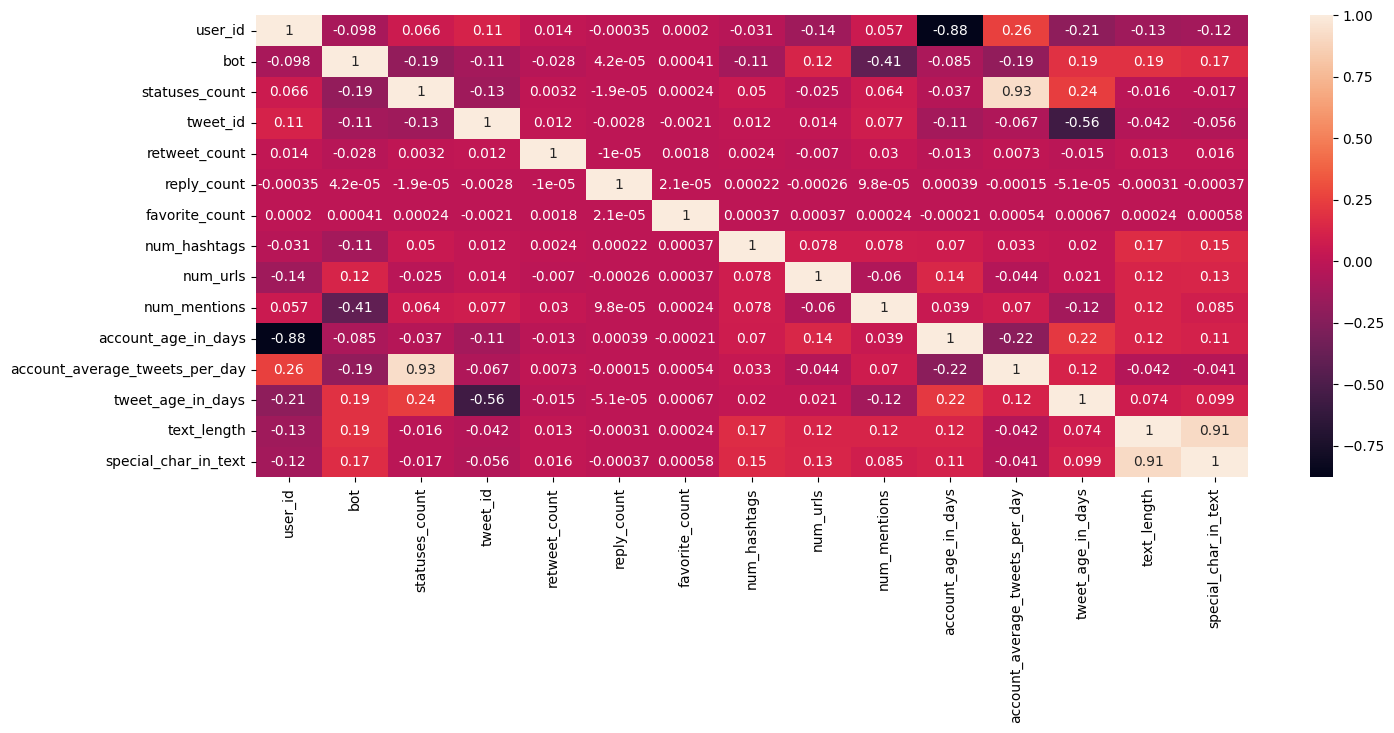

In [7]:
plt.figure(figsize = (16,6))
sns.heatmap(correlation_df.corr(), annot = True)#, figsize=(10,10)

Highlighting correlating attributes where correlation is lower than -0.5 or higher than 0.5. Excluding obvious correlation like being correlated with yourself.

C:\Users\admin\AppData\Local\Temp\ipykernel_4552\2945485151.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCorr = correlation_df.corr()


<Figure size 1600x600 with 0 Axes>

<AxesSubplot: >

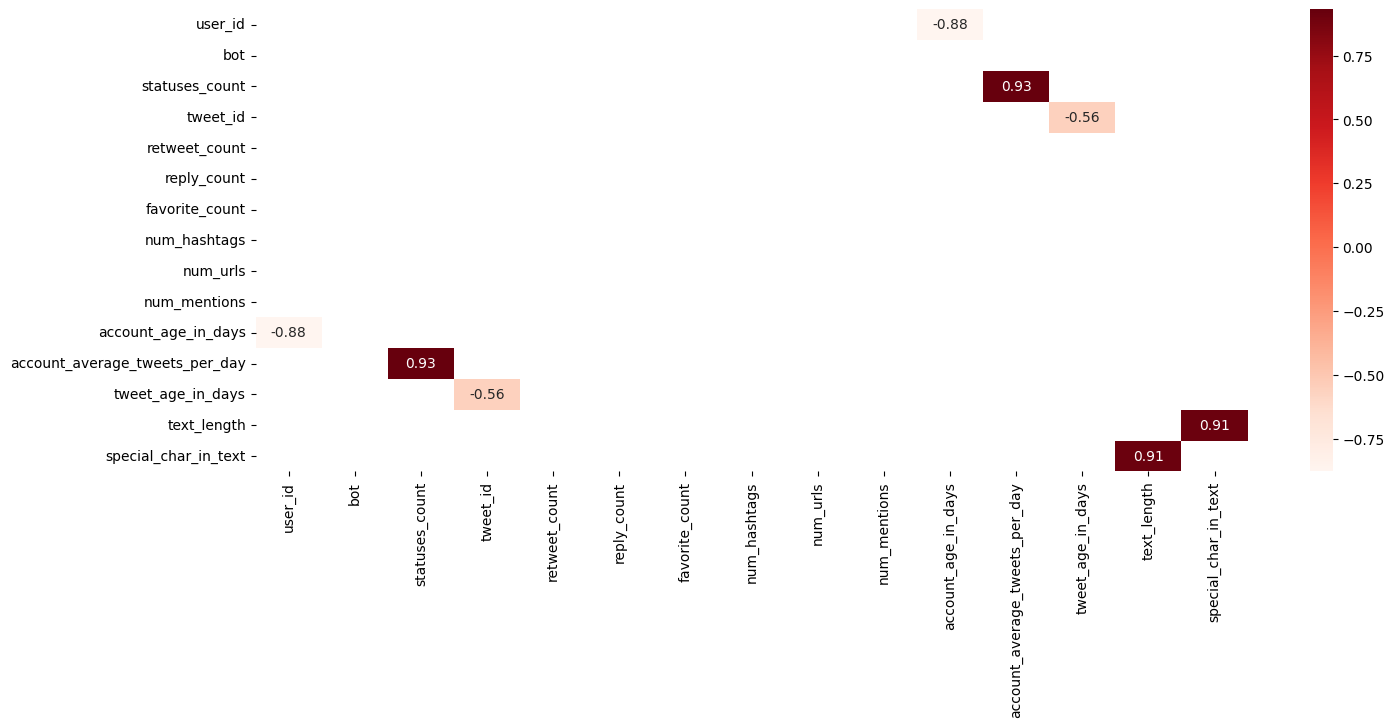

In [8]:
dfCorr = correlation_df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(16,6))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

We can see from the plot above that the number of tweets an account have made ("statuses_count") and its average tweets per day("account_average_tweets_per_day"), has a high correlation. We also see that the length of the tweet("text_length"), and the number of special charackters it contains("special_char_in_text") has a high correlation. 

In [9]:
#sns.regplot(x=correlation_df["column_name"], y=correlation_df["column_name"], fit_reg= True)